# Exploring and understanding the salary dataset

Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

Read in the dataset:

In [2]:
salary_data = pd.read_csv('Salary.csv')
salary_data.sample(10)

,YearsExperience,Salary
33,12.9,135675
8,3.2,64445
21,7.1,98273
26,9.5,116969
14,4.5,61111
11,4.0,55794
34,13.5,139465
31,11.5,126756
18,5.9,81363
30,11.2,127345


In [3]:
salary_data.shape

(35, 2)

In [4]:
salary_data.info()  #gives you info on the type of data you have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
salary_data.describe()  #gives you a summary of the data you are working with

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
salary_data.skew()  #gives you information about the number of outliers you have

YearsExperience    0.420163
Salary             0.209005
dtype: float64

Plot histogram of the years of experience aslo plot the kde which is a smooth curve representing the same data as the histogram.

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

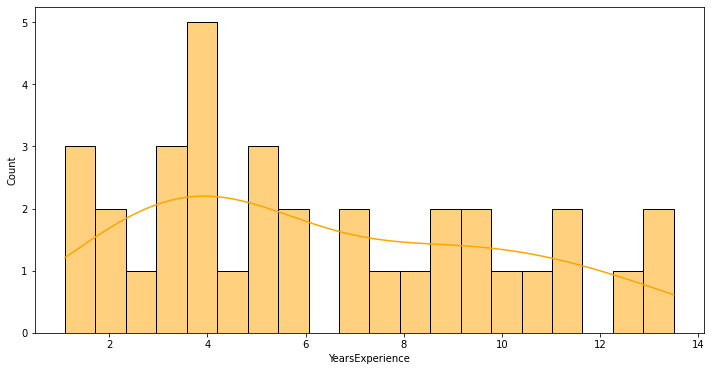

In [7]:
plt.figure(figsize = (12,6))
sns.histplot(x = salary_data['YearsExperience'], bins =20, kde = True, color = 'orange')

<AxesSubplot:xlabel='Salary', ylabel='Count'>

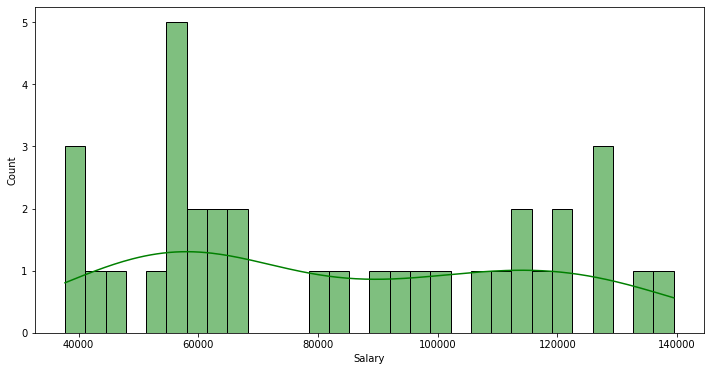

In [8]:
plt.figure(figsize = (12,6))
sns.histplot(x = salary_data['Salary'], bins = 30, kde = True, color = 'green')

Boxplot of data:

<AxesSubplot:ylabel='YearsExperience'>

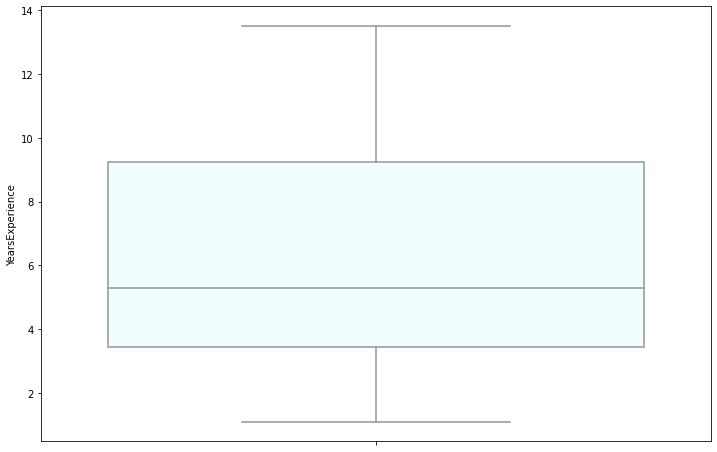

In [9]:
plt.figure(figsize = (12,8))
sns.boxplot(y = salary_data['YearsExperience'], color = 'azure')

You can see the IQR goes from 3 years to 9.5 years.

<AxesSubplot:ylabel='Salary'>

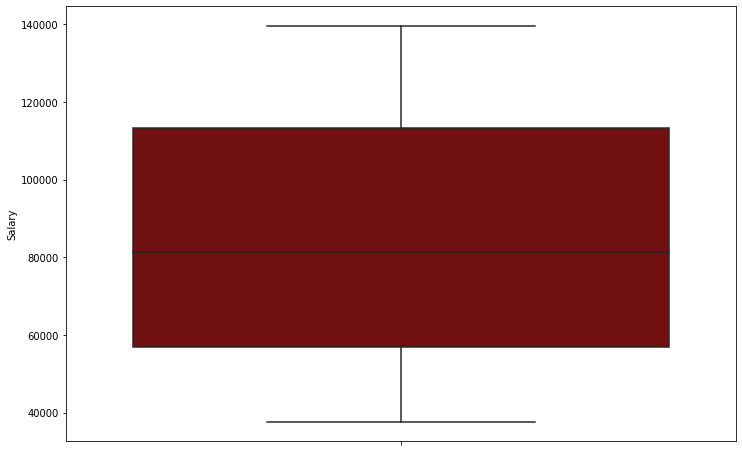

In [10]:
plt.figure(figsize = (12,8))
sns.boxplot(y = salary_data['Salary'], color = 'maroon')

# Dealing with outliers and missing values

## Outliers:

In [11]:
Q1 = salary_data.quantile(0.25, axis = 0)
print('First_Quartile :', Q1)

First_Quartile : YearsExperience        3.45
Salary             57019.00
Name: 0.25, dtype: float64


In [12]:
Q3 = salary_data.quantile(0.75, axis = 0)
print('Third_Quartile :', Q1)

Third_Quartile : YearsExperience        3.45
Salary             57019.00
Name: 0.25, dtype: float64


In [13]:
IQR = Q3 - Q1
print('IQR :', IQR)

IQR : YearsExperience        5.8
Salary             56204.5
dtype: float64


Now remove outliers:

In [14]:
salary_data_outliers = salary_data[((salary_data < (Q1 - 1.5 * IQR)) |\
                                   (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data_outliers

,YearsExperience,Salary


In [15]:
salary_data = salary_data[~((salary_data < (Q1 - 1.5 * IQR)) |\
                         (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]
salary_data.shape

(35, 2)

<AxesSubplot:ylabel='Salary'>

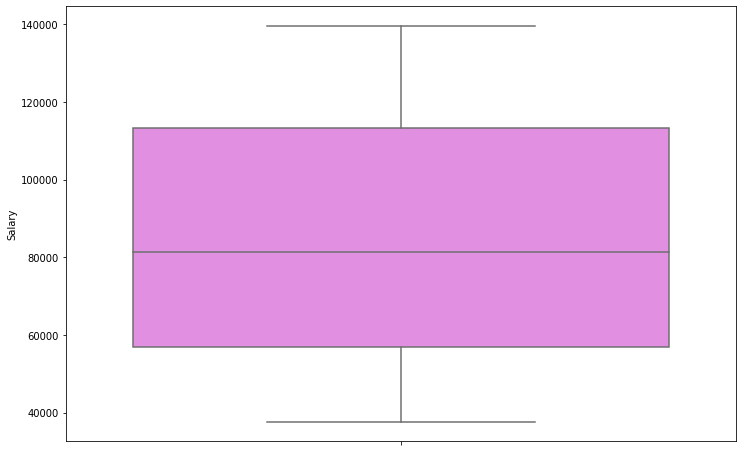

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot(y = salary_data['Salary'], color = 'violet')

All outliers are now removed.

## Sorting out the missing values:

In [17]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
mean_yrs_exp = salary_data['YearsExperience'].mean()
mean_yrs_exp

6.30857142857143

Don't drop any more values since you already have such a small dataset so replace nan values with the mean

In [19]:
salary_data['YearsExperience'].fillna(value = mean_yrs_exp, inplace = True)
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [20]:
salary_data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Text(0, 0.5, 'Salary')

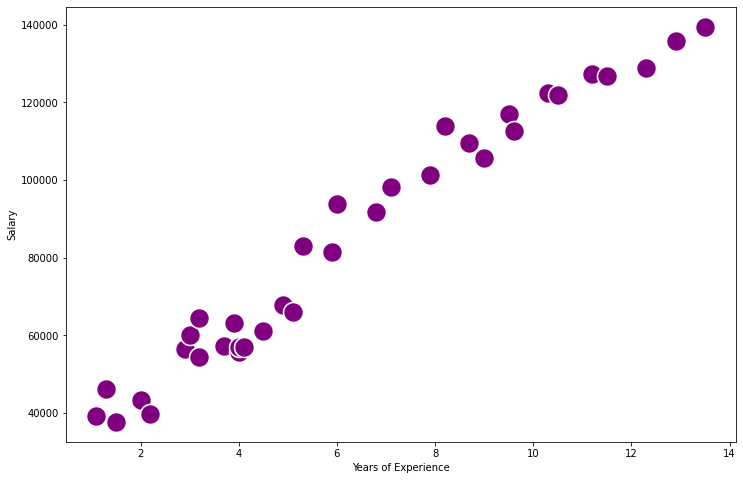

In [21]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'YearsExperience', y = 'Salary', s = 400, color = 'purple', data = salary_data)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Straight line relationship that exists. The more years experience you have the higher your salary

# Performing Simple LR:

First split data into training and testing data (30% for testing and 70% for training)

In [22]:
x = salary_data['YearsExperience']
y = salary_data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
x_train.shape, x_test.shape

((24,), (11,))

LR expects data to be in 2D so reshape the data

In [24]:
#ensure that the 2nd dimension has just 1 element and the 1st dimension will be the length of the vector.
x_train = x_train.to_numpy()
x_train = x_train.reshape((-1, 1)) 

y_train = y_train.to_numpy()
y_train = y_train.reshape((-1, 1))

x_train.shape, y_train.shape

((24, 1), (24, 1))

In [25]:
x_test = x_test.to_numpy()
x_test = x_test.reshape((-1, 1)) 

y_test = y_test.to_numpy()
y_test = y_test.reshape((-1, 1))

x_test.shape, y_test.shape

((11, 1), (11, 1))

Now train ML model:

In [27]:
lr = LinearRegression()
linear_reg_model = lr.fit(x_train, y_train)

In [28]:
linear_reg_model.coef_

array([[8555.33918938]])

Coefficient is a single value corresponding to the years of experience predictor. The fact that the predictor is positive means that there is a positive relationship between the years of experience and the salary.

Let's now look at the itercept that this model found:

In [29]:
linear_reg_model.intercept_

array([29602.07353482])

Now that we have a model we can use it for prediction. Let's invoke prediction on the test data.

In [30]:
y_pred = linear_reg_model.predict(x_test)
y_pred[:5]

array([[110877.79583392],
       [ 64678.96421127],
       [104033.52448241],
       [ 90344.98177941],
       [ 71523.23556278]])

In [31]:
print('Training Score:', linear_reg_model.score(x_train, y_train))

Training Score: 0.9755630578296774


In [32]:
print('Testing Score:', linear_reg_model.score(x_test, y_test))

Testing Score: 0.9171426108885095


Let's look at the actual linear model that was fit on the training data points

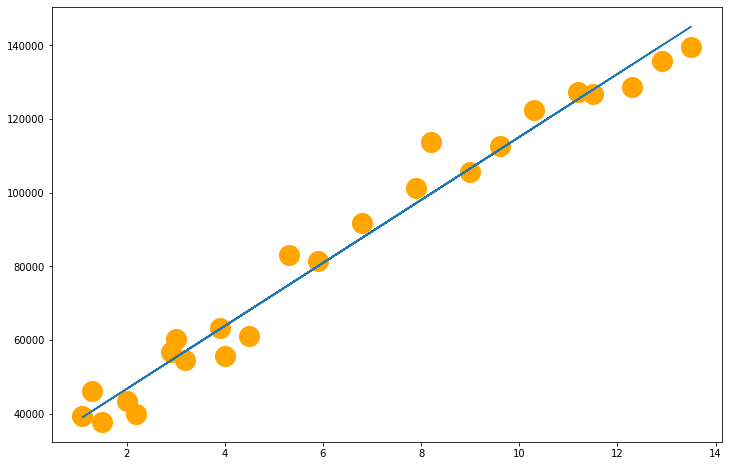

In [33]:
f, ax = plt.subplots(figsize = (12,8))

plt.plot(x_train, y_train, 'o', markersize = 20, color = 'orange')
plt.plot(x_train, linear_reg_model.coef_ * x_train + linear_reg_model.intercept_)

How does the linear model fit on the test data:

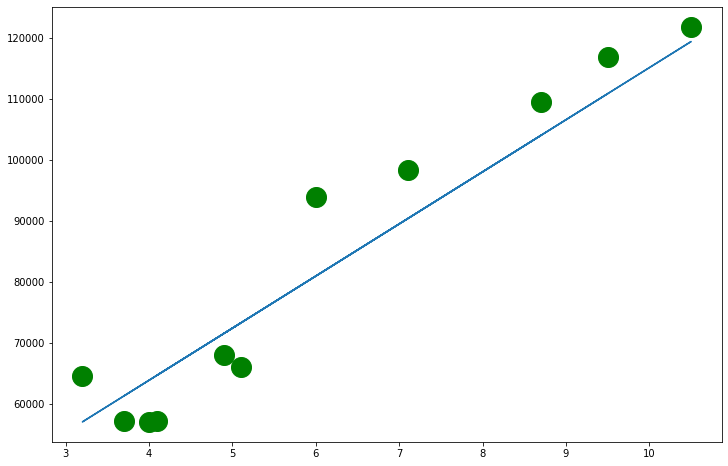

In [34]:
f, ax = plt.subplots(figsize = (12,8))

plt.plot(x_test, y_test, 'o', markersize = 20, color = 'green')
plt.plot(x_test, linear_reg_model.coef_ * x_test + linear_reg_model.intercept_)